# 房价数据预测——线性回归分析
数据说明： Capital Bikeshare （美国Washington, D.C.的一个共享单车公司）提供的共享单车数据。数据包含每天的日期、天气等信息，需要预测每天的共享单车骑行量。

1、导入必要的工具包

In [1]:
import numpy as np  # 矩阵操作
import pandas as pd # SQL数据处理

from sklearn.metrics import r2_score  #评价回归预测模型的性能

import matplotlib.pyplot as plt   #画图
import seaborn as sns

# 图形出现在Notebook里而不是新窗口
%matplotlib inline

2、数据探索

2.1 读取数据

In [2]:
# path to where the data lies
#dpath = './data/'
train_data = pd.read_csv("Ames_House_train.csv")

#通过观察前5行，了解数据每列（特征）的概况
train_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

2.2 数据基本信息
样本数目、特征维数
每个特征的类型、空值样本的数目、数据类型

In [3]:
train_data.shape

(1460, 81)

2.3 数据探索
请见另一个文件：1week_0_Explore.pynb

对数据的探索有助于我们在第三步中根据数据的特点选择合适的模型类型

2.4 数据准备

In [4]:
train_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
# 从原始数据中分离输入特征x和输出y
y = train_data['SalePrice'].values

#去掉非数字数据
train_dataRemove = train_data.drop('MSSubClass',axis = 1)
train_dataRemove = train_dataRemove.drop('MSZoning',axis = 1)
train_dataRemove = train_dataRemove.drop('Street',axis = 1)
train_dataRemove = train_dataRemove.drop('Alley',axis = 1)
train_dataRemove = train_dataRemove.drop('LotShape',axis = 1)
train_dataRemove = train_dataRemove.drop('LandContour',axis = 1)
train_dataRemove = train_dataRemove.drop('Utilities',axis = 1)
train_dataRemove = train_dataRemove.drop('LotConfig',axis = 1)
train_dataRemove = train_dataRemove.drop('LandSlope',axis = 1)
train_dataRemove = train_dataRemove.drop('Neighborhood',axis = 1)
train_dataRemove = train_dataRemove.drop('Condition1',axis = 1)
train_dataRemove = train_dataRemove.drop('Condition2',axis = 1)
train_dataRemove = train_dataRemove.drop('BldgType',axis = 1)
train_dataRemove = train_dataRemove.drop('HouseStyle',axis = 1)
train_dataRemove = train_dataRemove.drop('RoofStyle',axis = 1)
train_dataRemove = train_dataRemove.drop('RoofMatl',axis = 1)
train_dataRemove = train_dataRemove.drop('Exterior1st',axis = 1)
train_dataRemove = train_dataRemove.drop('Exterior2nd',axis = 1)
train_dataRemove = train_dataRemove.drop('MasVnrType',axis = 1)
train_dataRemove = train_dataRemove.drop('ExterQual',axis = 1)
train_dataRemove = train_dataRemove.drop('ExterCond',axis = 1)
train_dataRemove = train_dataRemove.drop('Foundation',axis = 1)
train_dataRemove = train_dataRemove.drop('BsmtFinType1',axis = 1)
train_dataRemove = train_dataRemove.drop('BsmtFinType2',axis = 1)
train_dataRemove = train_dataRemove.drop('BsmtQual',axis = 1)
train_dataRemove = train_dataRemove.drop('BsmtCond',axis = 1)
train_dataRemove = train_dataRemove.drop('BsmtExposure',axis = 1)
train_dataRemove = train_dataRemove.drop('Heating',axis = 1)
train_dataRemove = train_dataRemove.drop('HeatingQC',axis = 1)
train_dataRemove = train_dataRemove.drop('CentralAir',axis = 1)
train_dataRemove = train_dataRemove.drop('Electrical',axis = 1)
train_dataRemove = train_dataRemove.drop('KitchenQual',axis = 1)
train_dataRemove = train_dataRemove.drop('Functional',axis = 1)
train_dataRemove = train_dataRemove.drop('FireplaceQu',axis = 1)
train_dataRemove = train_dataRemove.drop('GarageType',axis = 1)
train_dataRemove = train_dataRemove.drop('GarageFinish',axis = 1)
train_dataRemove = train_dataRemove.drop('GarageQual',axis = 1)
train_dataRemove = train_dataRemove.drop('GarageCond',axis = 1)
train_dataRemove = train_dataRemove.drop('PavedDrive',axis = 1)
train_dataRemove = train_dataRemove.drop('PoolQC',axis = 1)
train_dataRemove = train_dataRemove.drop('Fence',axis = 1)
train_dataRemove = train_dataRemove.drop('MiscFeature',axis = 1)
train_dataRemove = train_dataRemove.drop('SaleType',axis = 1)
train_dataRemove = train_dataRemove.drop('SaleCondition',axis = 1)

#低关联性数据
train_dataRemove = train_dataRemove.drop('OverallCond',axis = 1)
train_dataRemove = train_dataRemove.drop('LowQualFinSF',axis = 1)
train_dataRemove = train_dataRemove.drop('BsmtHalfBath',axis = 1)
train_dataRemove = train_dataRemove.drop('EnclosedPorch',axis = 1)
train_dataRemove = train_dataRemove.drop('3SsnPorch',axis = 1)
train_dataRemove = train_dataRemove.drop('ScreenPorch',axis = 1)
train_dataRemove = train_dataRemove.drop('PoolArea',axis = 1)
train_dataRemove = train_dataRemove.drop('MiscVal',axis = 1)
train_dataRemove = train_dataRemove.drop('MoSold',axis = 1)
train_dataRemove = train_dataRemove.drop('YrSold',axis = 1)

X = train_dataRemove.drop('SalePrice',axis = 1)

#去掉存在空值的数据
X = X.fillna(0.0)

X.isnull().sum()

#用于后续显示权重系数对应的特征
columns = X.columns
print(columns)

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF'],
      dtype='object')


In [6]:
#将数据分割训练数据与测试数据
from sklearn.model_selection import train_test_split

# 随机采样20%的数据构建测试样本，其余作为训练样本
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33, test_size=0.2)
X_train.shape

(1168, 26)

2.5 数据预处理／特征工程
特征工程是实际任务中特别重要的环节。

In [7]:
# 数据标准化
from sklearn.preprocessing import StandardScaler

ss_X = StandardScaler()
ss_y = StandardScaler()

# 分别对训练和测试数据的特征以及目标值进行标准化处理
X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)

#对y做标准化不是必须
#对y标准化的好处是不同问题的w差异不太大，同时正则参数的范围也有限
y_train = ss_y.fit_transform(y_train.reshape(-1, 1))
y_test = ss_y.transform(y_test.reshape(-1, 1))

C:\Users\YuGo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\YuGo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\YuGo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


3、确定模型类型

3.1 尝试缺省参数的线性回归

In [8]:
# 线性回归
#class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
from sklearn.linear_model import LinearRegression

# 使用默认配置初始化
lr = LinearRegression()

# 训练模型参数
lr.fit(X_train, y_train)

# 预测
y_test_pred_lr = lr.predict(X_test)
y_train_pred_lr = lr.predict(X_train)


# 看看各特征的权重系数，系数的绝对值大小可视为该特征的重要性
fs = pd.DataFrame({"columns":list(columns), "coef":list((lr.coef_.T))})
fs.sort_values(by=['coef'],ascending=False)

columns                      coef
12      2ndFlrSF      [0.2798480119217816]
3    OverallQual     [0.26640865950351794]
11      1stFlrSF      [0.2656173997572214]
7     BsmtFinSF1     [0.10989253674651933]
19  TotRmsAbvGrd     [0.10596469504353777]
10   TotalBsmtSF     [0.10109684424132556]
4      YearBuilt     [0.08344586707585637]
5   YearRemodAdd     [0.07210770120005856]
22    GarageCars     [0.07167564232808438]
2        LotArea     [0.06549398788305008]
23    GarageArea    [0.056587176144907346]
6     MasVnrArea     [0.05018458602582234]
1    LotFrontage    [0.039225534711106416]
20    Fireplaces     [0.03384965167255298]
24    WoodDeckSF     [0.03317058510140644]
0             Id    [0.007196596768281257]
25   OpenPorchSF     [0.00450082969436748]
13     GrLivArea   [0.0019755310982400302]
8     BsmtFinSF2  [-0.0011780504047946361]
16      HalfBath   [-0.003262494200630012]
14  BsmtFullBath   [-0.004066592459833486]
9      BsmtUnfSF   [-0.010493950450894874]
15      FullBath    [-0.01601733078785253]
21   GarageYrBlt    [-0.06683325230380059]
18  KitchenAbvGr    [-0.07995924897132729]
17  BedroomAbvGr    [-0.09459883857147754]

3.1.1 模型评价

In [9]:
# 使用r2_score评价模型在测试集和训练集上的性能，并输出评估结果
#测试集
print ("The r2 score of LinearRegression on test is %10.3f" % r2_score(y_test, y_test_pred_lr))
#训练集
print ("The r2 score of LinearRegression on train is %10.3f" % r2_score(y_train, y_train_pred_lr))

The r2 score of LinearRegression on test is      0.652
The r2 score of LinearRegression on train is      0.831


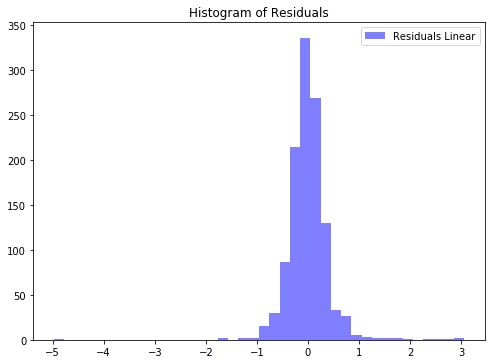

In [10]:
#在训练集上观察预测残差的分布，看是否符合模型假设：噪声为0均值的高斯噪声
f, ax = plt.subplots(figsize=(7, 5)) 
f.tight_layout() 
ax.hist(y_train - y_train_pred_lr,bins=40, label='Residuals Linear', color='b', alpha=.5); 
ax.set_title("Histogram of Residuals") 
ax.legend(loc='best');

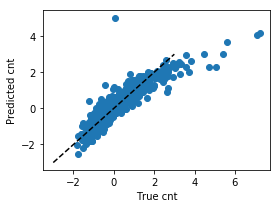

In [11]:
#还可以观察预测值与真值的散点图
plt.figure(figsize=(4, 3))
plt.scatter(y_train, y_train_pred_lr)
plt.plot([-3, 3], [-3, 3], '--k')   #数据已经标准化，3倍标准差即可
plt.axis('tight')
plt.xlabel('True cnt')
plt.ylabel('Predicted cnt')
plt.tight_layout()

In [14]:
#岭回归／L2正则
#class sklearn.linear_model.RidgeCV(alphas=(0.1, 1.0, 10.0), fit_intercept=True, 
#                                  normalize=False, scoring=None, cv=None, gcv_mode=None, 
#                                  store_cv_values=False)
from sklearn.linear_model import  RidgeCV

#设置超参数（正则参数）范围
alphas = [ 0.01, 0.1, 1, 10,100]
#n_alphas = 20
#alphas = np.logspace(-5,2,n_alphas)

#生成一个RidgeCV实例
ridge = RidgeCV(alphas=alphas, store_cv_values=True)  

#模型训练
ridge.fit(X_train, y_train)    

#预测
y_test_pred_ridge = ridge.predict(X_test)
y_train_pred_ridge = ridge.predict(X_train)


# 评估，使用r2_score评价模型在测试集和训练集上的性能
print ("The r2 score of RidgeCV on test is %f" % r2_score(y_test, y_test_pred_ridge))
print ("The r2 score of RidgeCV on train is %f" % r2_score(y_train, y_train_pred_ridge))

The r2 score of RidgeCV on test is 0.665817
The r2 score of RidgeCV on train is 0.829363


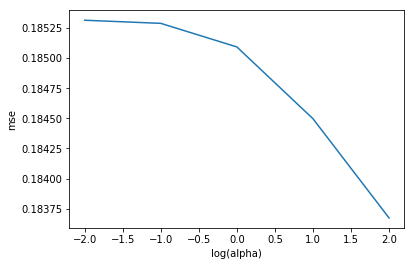

alpha is: 100.0


columns                   coef_lr                coef_ridge
12      2ndFlrSF      [0.2798480119217816]     [0.10329045009678285]
3    OverallQual     [0.26640865950351794]      [0.2385622883746671]
11      1stFlrSF      [0.2656173997572214]     [0.11966754522060069]
7     BsmtFinSF1     [0.10989253674651933]     [0.10405076842035424]
19  TotRmsAbvGrd     [0.10596469504353777]     [0.09473866650076485]
10   TotalBsmtSF     [0.10109684424132556]     [0.10365166185672213]
4      YearBuilt     [0.08344586707585637]     [0.07135960820605176]
5   YearRemodAdd     [0.07210770120005856]     [0.07713209153322698]
22    GarageCars     [0.07167564232808438]     [0.06694986539485863]
2        LotArea     [0.06549398788305008]     [0.06086669383030795]
23    GarageArea    [0.056587176144907346]    [0.062338356277988886]
6     MasVnrArea     [0.05018458602582234]    [0.058015696627846225]
1    LotFrontage    [0.039225534711106416]     [0.03995122995827868]
20    Fireplaces     [0.03384965167255298]     [0.04558615659008748]
24    WoodDeckSF     [0.03317058510140644]    [0.036708082803312864]
0             Id    [0.007196596768281257]   [0.0067749864871391174]
25   OpenPorchSF     [0.00450082969436748]    [0.009789851998811064]
13     GrLivArea   [0.0019755310982400302]      [0.1615157749911224]
8     BsmtFinSF2  [-0.0011780504047946361]  [-0.0029911854694670836]
16      HalfBath   [-0.003262494200630012]    [0.016638058189140683]
14  BsmtFullBath   [-0.004066592459833486]     [0.00902877485030723]
9      BsmtUnfSF   [-0.010493950450894874]  [-0.0016412899886381407]
15      FullBath    [-0.01601733078785253]     [0.01443830427952189]
21   GarageYrBlt    [-0.06683325230380059]   [-0.050991996173882746]
18  KitchenAbvGr    [-0.07995924897132729]     [-0.0739995519543332]
17  BedroomAbvGr    [-0.09459883857147754]    [-0.07389099446676818]

In [15]:
mse_mean = np.mean(ridge.cv_values_, axis = 0)
plt.plot(np.log10(alphas), mse_mean.reshape(len(alphas),1)) 

#这是为了标出最佳参数的位置，不是必须
#plt.plot(np.log10(ridge.alpha_)*np.ones(3), [0.28, 0.29, 0.30])

plt.xlabel('log(alpha)')
plt.ylabel('mse')
plt.show()

print ('alpha is:', ridge.alpha_)

# 看看各特征的权重系数，系数的绝对值大小可视为该特征的重要性
fs = pd.DataFrame({"columns":list(columns), "coef_lr":list((lr.coef_.T)), "coef_ridge":list((ridge.coef_.T))})
fs.sort_values(by=['coef_lr'],ascending=False)

In [16]:
#### Lasso／L1正则
# class sklearn.linear_model.LassoCV(eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, 
#                                    normalize=False, precompute=’auto’, max_iter=1000, 
#                                    tol=0.0001, copy_X=True, cv=None, verbose=False, n_jobs=1,
#                                    positive=False, random_state=None, selection=’cyclic’)
from sklearn.linear_model import LassoCV

#设置超参数搜索范围
#alphas = [ 0.01, 0.1, 1, 10,100]

#生成一个LassoCV实例
#lasso = LassoCV(alphas=alphas)  
lasso = LassoCV()  

#训练（内含CV）
lasso.fit(X_train, y_train)  

#测试
y_test_pred_lasso = lasso.predict(X_test)
y_train_pred_lasso = lasso.predict(X_train)


# 评估，使用r2_score评价模型在测试集和训练集上的性能
print ('The r2 score of LassoCV on test is', r2_score(y_test, y_test_pred_lasso))
print ('The r2 score of LassoCV on train is', r2_score(y_train, y_train_pred_lasso))

The r2 score of LassoCV on test is 0.6553152255218736
The r2 score of LassoCV on train is 0.8309665784960352


C:\Users\YuGo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


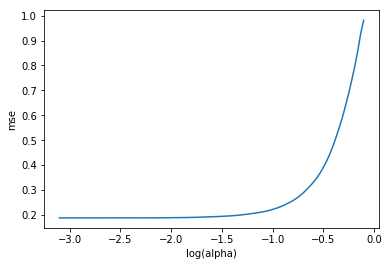

alpha is: 0.0008456506189417725


columns                   coef_lr                coef_ridge  \
12      2ndFlrSF      [0.2798480119217816]     [0.10329045009678285]   
3    OverallQual     [0.26640865950351794]      [0.2385622883746671]   
11      1stFlrSF      [0.2656173997572214]     [0.11966754522060069]   
7     BsmtFinSF1     [0.10989253674651933]     [0.10405076842035424]   
19  TotRmsAbvGrd     [0.10596469504353777]     [0.09473866650076485]   
10   TotalBsmtSF     [0.10109684424132556]     [0.10365166185672213]   
4      YearBuilt     [0.08344586707585637]     [0.07135960820605176]   
5   YearRemodAdd     [0.07210770120005856]     [0.07713209153322698]   
22    GarageCars     [0.07167564232808438]     [0.06694986539485863]   
2        LotArea     [0.06549398788305008]     [0.06086669383030795]   
23    GarageArea    [0.056587176144907346]    [0.062338356277988886]   
6     MasVnrArea     [0.05018458602582234]    [0.058015696627846225]   
1    LotFrontage    [0.039225534711106416]     [0.03995122995827868]   
20    Fireplaces     [0.03384965167255298]     [0.04558615659008748]   
24    WoodDeckSF     [0.03317058510140644]    [0.036708082803312864]   
0             Id    [0.007196596768281257]   [0.0067749864871391174]   
25   OpenPorchSF     [0.00450082969436748]    [0.009789851998811064]   
13     GrLivArea   [0.0019755310982400302]      [0.1615157749911224]   
8     BsmtFinSF2  [-0.0011780504047946361]  [-0.0029911854694670836]   
16      HalfBath   [-0.003262494200630012]    [0.016638058189140683]   
14  BsmtFullBath   [-0.004066592459833486]     [0.00902877485030723]   
9      BsmtUnfSF   [-0.010493950450894874]  [-0.0016412899886381407]   
15      FullBath    [-0.01601733078785253]     [0.01443830427952189]   
21   GarageYrBlt    [-0.06683325230380059]   [-0.050991996173882746]   
18  KitchenAbvGr    [-0.07995924897132729]     [-0.0739995519543332]   
17  BedroomAbvGr    [-0.09459883857147754]    [-0.07389099446676818]   

    coef_lasso  
12    0.227342  
3     0.267203  
11    0.223024  
7     0.117303  
19    0.102421  
10    0.091541  
4     0.080921  
5     0.071492  
22    0.069711  
2     0.064881  
23    0.056190  
6     0.050747  
1     0.038575  
20    0.034078  
24    0.032968  
0     0.006463  
25    0.003824  
13    0.057939  
8     0.000613  
16    0.000000  
14   -0.000000  
9    -0.000000  
15   -0.010078  
21   -0.063020  
18   -0.078852  
17   -0.092014

In [17]:
mses = np.mean(lasso.mse_path_, axis = 1)
plt.plot(np.log10(lasso.alphas_), mses) 
#plt.plot(np.log10(lasso.alphas_)*np.ones(3), [0.3, 0.4, 1.0])
plt.xlabel('log(alpha)')
plt.ylabel('mse')
plt.show()    
            
print ('alpha is:', lasso.alpha_)

# 看看各特征的权重系数，系数的绝对值大小可视为该特征的重要性
fs = pd.DataFrame({"columns":list(columns), "coef_lr":list((lr.coef_.T)), "coef_ridge":list((ridge.coef_.T)), "coef_lasso":list((lasso.coef_.T))})
fs.sort_values(by=['coef_lr'],ascending=False)

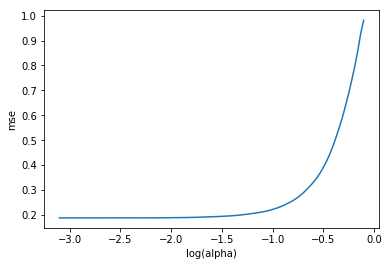

alpha is: 0.0008456506189417725


In [18]:
mses = np.mean(lasso.mse_path_, axis = 1)
plt.plot(np.log10(lasso.alphas_), mses) 
#plt.plot(np.log10(lasso.alphas_)*np.ones(3), [0.3, 0.4, 1.0])
plt.xlabel('log(alpha)')
plt.ylabel('mse')
plt.show()    
            
print ('alpha is:', lasso.alpha_)